<a href="https://colab.research.google.com/github/angienar/Data110-Fall25/blob/main/Week_5_and_6_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Week 5 and 6 Assignment**

## **0) Dataset & Setup**
*   Use the Seaborn Titanic dataset.
*   Work in Google Colab.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')

## **1) Understand the Data**

**Task 1 — Dataset overview (5–6 sentences).**
Identify the variables you will use (survived, pclass, sex, age, fare, embark_town, sibsp, parch). briefly explain why these columns matter for your analysis.

**Dataset Overview:**



In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


The dataset we will be using is called titanic which includes information about each passenger like age, or also sex which states if the passenger was female or male. There is a survived column which says if they survived or not, fare which states the price of their ticket, and pclass which ranked them in a class from 1 to 3. There was also embark_town which states which town they were in when the passenger entered the titanic, parch which states if they have any parent and child retaionship with someone on board, and sibsp which states if they have a sibling or spouse on board.

## **2) Fare & Survival (Week 5 core)**

**Task 2 — Fare distribution (histogram + KDE).**

Create a histogram and a KDE of fare. Discuss right-skew, outliers, and a socioeconomic interpretation.



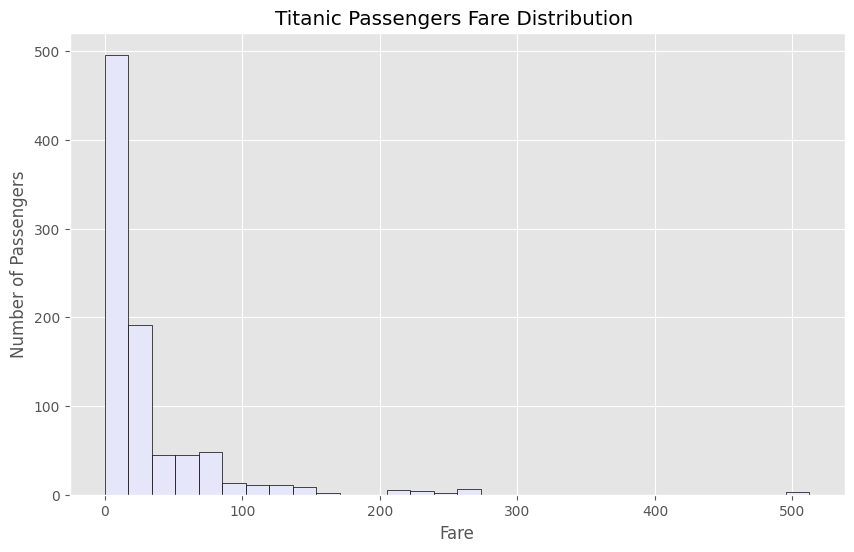

In [6]:
#Histogram
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.hist(titanic['fare'],bins=30,color='lavender',edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.title('Titanic Passengers Fare Distribution ')
plt.show()

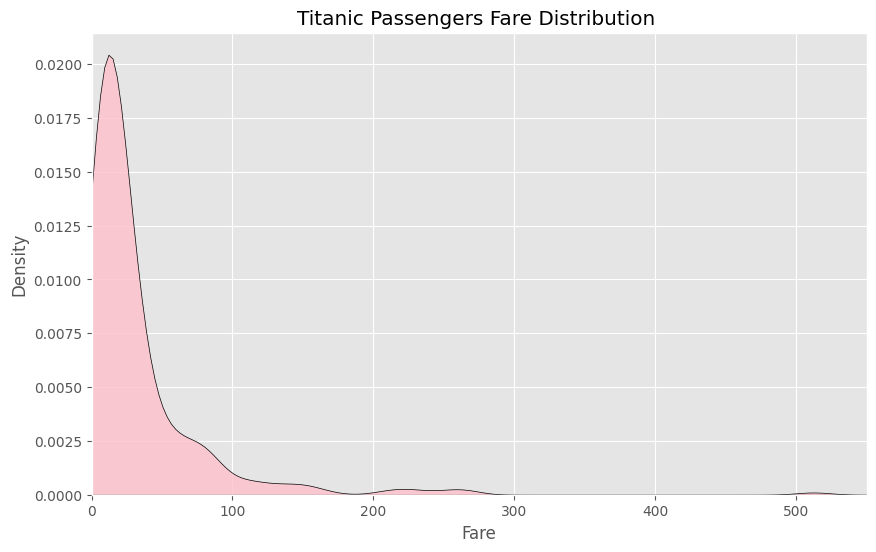

In [7]:
#KDE
plt.figure(figsize=(10,6))
sns.kdeplot(titanic['fare'], fill=True, color='pink', alpha = 0.8, edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Titanic Passengers Fare Distribution ')
plt.xlim(0,550)
plt.show()

The most noticable thing about the graphs is that they are right-skewed. Most of the peoples fare was between the 0 and 100, they were most likely people who were lower or middle class. There was also an outlier in the 500 which was probably someone who was rich and would afford a higher fare. It was interesting the gaps where there were no people like 200 and between 300 and 490. There were a few people between 200 and 300, they were most likely people who were of a higher class.

**Task 3 — Fare × Survival (distribution comparison).**

Compare fare distributions for survived = 0 vs 1 (e.g., overlaid KDEs). Focus your interpretation on distribution shapes, not just means.

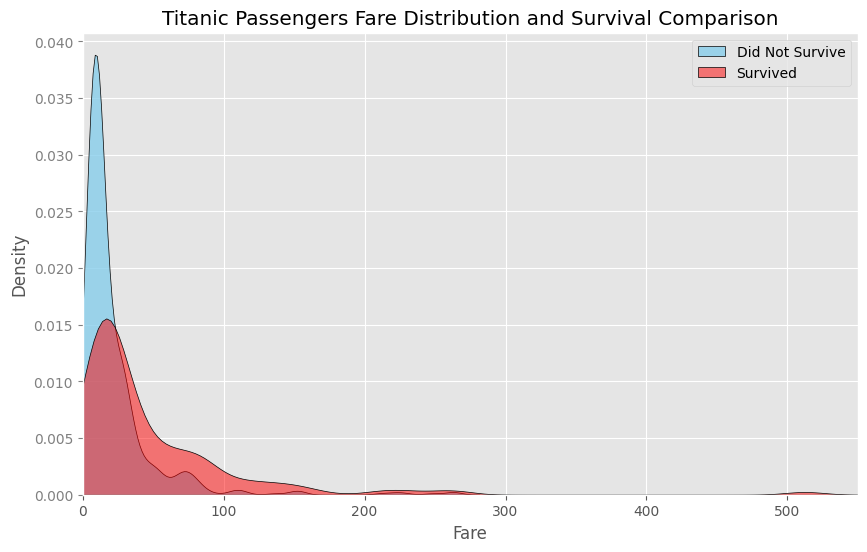

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic[titanic['survived'] == 0]['fare'], bw_adjust=0.7, fill=True, color="skyblue", edgecolor='black',alpha=0.8, label='Did Not Survive')
sns.kdeplot(titanic[titanic['survived'] == 1]['fare'], bw_adjust=0.7, fill=True, color="red",edgecolor='black', alpha=0.5, label='Survived')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Titanic Passengers Fare Distribution and Survival Comparison')
plt.xlim(0, 550)
plt.tick_params(axis='y', colors='gray')
plt.legend()
plt.show()

The did not survive graph seem to end before 200 meaning people with lower fares died. The survived graph is stretched out, and it seems that all the higher fares survived. There are some people with lower fares who survived but most did not.

## **3) Week-6 Add-Ons (exactly three plots)**

In [11]:
!pip install joypy

In [12]:
from joypy import joyplot



**Task 4 — Boxplot across multiple groups (fare).**

Make a boxplot of fare grouped by pclass, with an additional split by sex. Interpret what differs across groups.


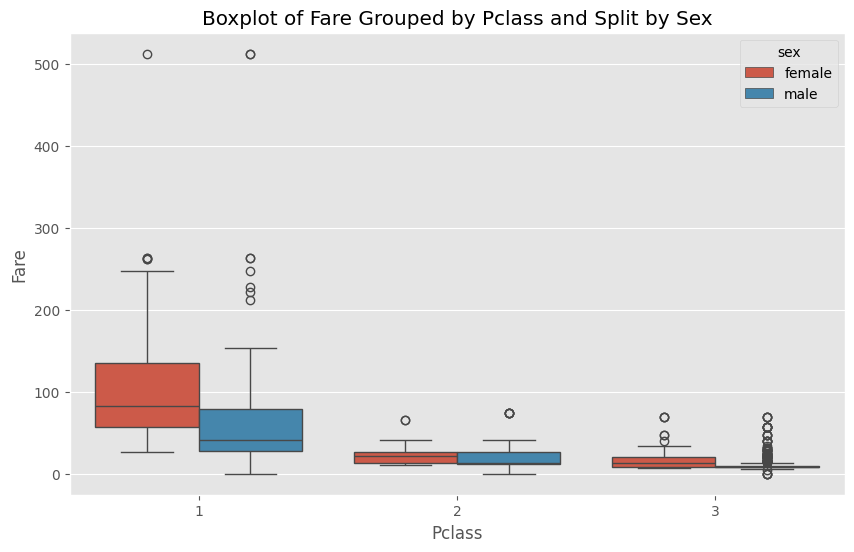

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', hue= 'sex', data=titanic)
#hue can be used to change color for different data, like separating the boxplots by sex
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Boxplot of Fare Grouped by Pclass and Split by Sex')
plt.show()

**Task 5 — Violin (age by sex).**

Create a violin plot of age by sex. State any meaningful differences and what they suggest.

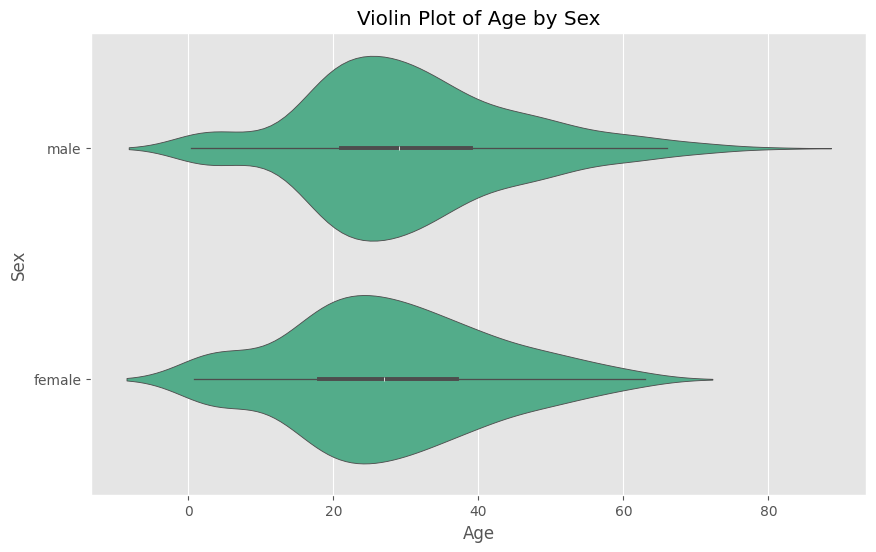

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='age', y='sex', color='#44bb8e', data=titanic)
plt.xlabel('Age')
plt.ylabel('Sex')
plt.title('Violin Plot of Age by Sex')
plt.show()

**Task 6 — Strip (detail on top of violin or boxplot).**

Overlay individual observations to expose clusters and outliers. Explain what becomes visible with points that’s not obvious from the aggregate shape alone.

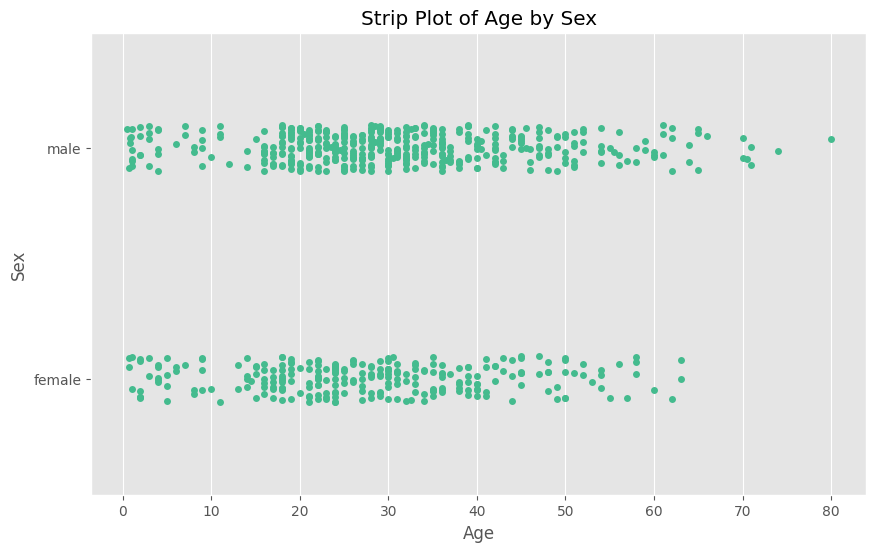

In [38]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='age', y='sex', color='#44bb8e', data=titanic)
plt.xlabel('Age')
plt.ylabel('Sex')
plt.title('Strip Plot of Age by Sex')
plt.show()